In [16]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Load the MassiveNuS convergence dataset

See http://www.columbialensing.org/#massivenus for more information

## Shape catalog

From the HSC-XMM field shape catalog generate:
- noise covariance matrix
- survey mask
- e1, e2 maps

In [3]:
from astropy.table import Table
from astropy.io import fits

In [87]:
cat = Table.read('../data/193145.fits')

In [88]:
#cat.keys()

In [89]:
survey_cut = (cat['ira']>35.5) * (cat['ira']<38.5) * (cat['idec']>-6) * (cat['idec']<-3)

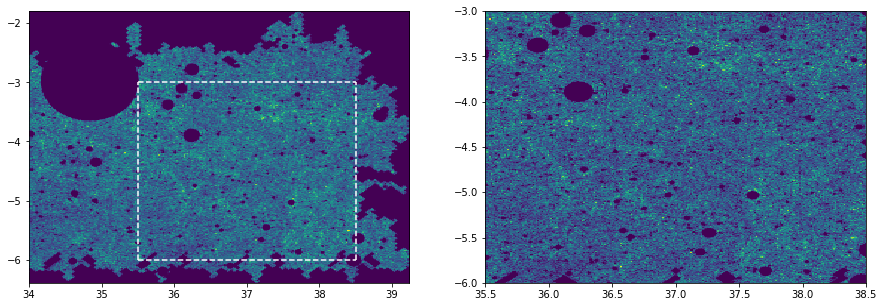

In [90]:
figure(figsize=[15,5])
subplot(121)
hist2d(cat['ira'], cat['idec'], 256);
hlines(y=-3,xmin=35.5, xmax=38.5, color='w', linestyle='--')
hlines(y=-6,xmin=35.5, xmax=38.5, color='w', linestyle='--')
vlines(x=35.5,ymin=-6, ymax=-3, color='w', linestyle='--')
vlines(x=38.5,ymin=-6, ymax=-3, color='w', linestyle='--')
subplot(122)
hist2d(cat['ira'][survey_cut], cat['idec'][survey_cut], 256);

cat = cat[survey_cut]

Ensure that our assumption of redshift mean is correct

Mean redshift 0.9701822


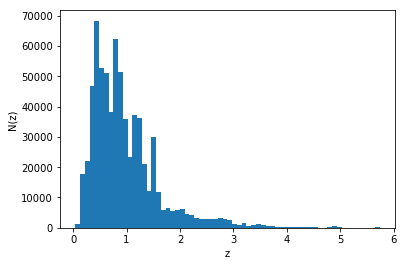

In [91]:
hist(cat['photoz_best'], 64);
xlabel('z')
ylabel('N(z)')
print('Mean redshift', np.mean(cat['photoz_best']))

Bin the catalog using [lenspack](https://github.com/CosmoStat/lenspack/tree/master/lenspack).

In [93]:
from lenspack.utils import bin2d

# Compute boundaries of the field so that it fits in a 360x360 map
# MassiveNuS maps beging 512x512 with 0.4 arcmin resolution, we resize them to 360x360
resolution = 512/360*0.4
width = 360
size = width * resolution / 60.

ra = median(cat['ira'])
dec = median(cat['idec'])
extent = [ra - size/2, ra + size/2, dec - size/2, dec + size/2]

**Number of galaxy per pixel map**

In [94]:
from

[35.32229969836382, 38.74508838957193, -6.182165696518113, -2.7713625255481635]

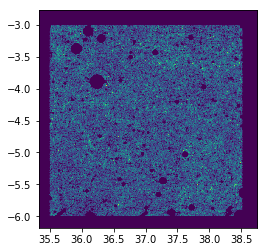

In [96]:
n_gal_map = bin2d(cat['ira'], cat['idec'],
                  npix=width,
                  extent=extent)

imshow(n_gal_map, origin='lower', extent=get_extend_radec(resolution, width,ra, dec))

## Kaiser-Squires solution

Use the first mass-mapping technique [Kaiser-Squires (1993)](https://ui.adsabs.harvard.edu/abs/1993ApJ...404..441K/abstract)

## Wiener filter solution

Get the maximum-a-posteriori (MAP), assuming a Gaussian prior that is characterised by the theoretical power spectrum.

1) The likelihood

2) The prior

**MAP**